In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import re
import string
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras import layers
from tensorflow.keras import losses
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
main_directory = '/content/drive/My Drive/soft coding lab/assignment 3/Dataset 3.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv(main_directory)

In [ ]:
df

,tweets,sentiment
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...
10309,No Depression by G Herbo is my mood from now o...,1
10310,What do you do when depression succumbs the br...,1
10311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,dont mistake a bad day with depression! everyo...,1


In [ ]:
df.groupby('sentiment').count()

,tweets
sentiment,
0,8000
1,2314


In [ ]:
sentiment = df.sentiment
tweets = df.tweets

In [ ]:
def remove_URL(text):
    url = re.compile(r"https?://\S+|www\.\S+")
    return url.sub(r"", text)


def remove_html(text):
    html = re.compile(r"<.*?>")
    return html.sub(r"", text)

def remove_emoji(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r"", text)

def remove_number(text):
  number = re.compile(r"[0-9]+")
  return number.sub(r"", text)

In [ ]:
index = 0
for sentc in tweets:
  sentc = remove_URL(sentc)
  sentc = remove_html(sentc)
  sentc = remove_emoji(sentc)
  sentc = remove_number(sentc)
  sentc = sentc.translate(str.maketrans('', '', string.punctuation))
  tweets.iloc[index] = sentc
  index = index + 1
  


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
print(tweets)

0        just had a real good moment i missssssssss him...
1                                       is reading manga  
2                                         comeagainjen    
3        lapcat Need to send em to my accountant tomorr...
4                 ADD ME ON MYSPACE  myspacecomLookThunder
                               ...                        
10309    No Depression by G Herbo is my mood from now o...
10310    What do you do when depression succumbs the br...
10311    Ketamine Nasal Spray Shows Promise Against Dep...
10312    dont mistake a bad day with depression everyon...
10313                                                     
Name: tweets, Length: 10314, dtype: object


In [ ]:
train_x,test_x,train_y,test_y = train_test_split(tweets,sentiment,random_state=1,test_size=0.20)
train_x.shape,test_x.shape,train_y.shape,test_y.shape

((8251,), (2063,), (8251,), (2063,))

In [ ]:
train_y.value_counts(),test_y.value_counts()

(0    6392
 1    1859
 Name: sentiment, dtype: int64, 0    1608
 1     455
 Name: sentiment, dtype: int64)

In [ ]:
train_sent_len = train_x.apply(lambda x:len(str(x).split()))
train_sent_len = train_sent_len.max()
test_sent_len = test_x.apply(lambda x:len(str(x).split()))
test_sent_len = test_sent_len.max()

print('Train Max Sentence Length : ',train_sent_len)
print('Test Max Sentence Length : ',test_sent_len)

Train Max Sentence Length :  58
Test Max Sentence Length :  58


In [ ]:
num_words = 30000

tokenizer = Tokenizer(num_words=num_words,oov_token="unk")
tokenizer.fit_on_texts(train_x.tolist())

In [ ]:
train_x = np.array( tokenizer.texts_to_sequences(train_x.tolist()))
test_x  = np.array( tokenizer.texts_to_sequences(test_x.tolist()))



train_x = pad_sequences(train_x, padding='post', maxlen=58)
test_x = pad_sequences(test_x, padding='post', maxlen=58)

print(train_x[0])

[  49   12    5 1452   10 5386   50    7  397 2202  446  305   58  160
   25   82 3513 5387 1303    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


In [ ]:
train_x,valid_x,train_y,valid_y = train_test_split(train_x,train_y,random_state=1,test_size=0.20)
train_x.shape,valid_x.shape,train_y.shape,valid_y.shape

((6600, 58), (1651, 58), (6600,), (1651,))

In [ ]:
le = LabelEncoder()

train_labels = le.fit_transform(train_y.to_list())
train_labels = np.asarray( tf.keras.utils.to_categorical(train_labels))

valid_labels = le.transform(valid_y.to_list())
valid_labels = np.asarray( tf.keras.utils.to_categorical(valid_labels))
list(le.classes_)

train_ds = tf.data.Dataset.from_tensor_slices((train_x,train_labels))
valid_ds = tf.data.Dataset.from_tensor_slices((valid_x,valid_labels))

In [ ]:
train_labels

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [ ]:
max_features =30000
embedding_dim =20
sequence_length = 58

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(max_features +1, embedding_dim, input_length=sequence_length,\
                                    embeddings_regularizer = regularizers.l2(0.0003)))                                    


model.add(tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(20,dropout=0.2, recurrent_dropout=0.2,return_sequences=True,\
                                                             kernel_regularizer=regularizers.l2(0.003),\
                                                             bias_regularizer=regularizers.l2(0.003))))

model.add(tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(20,dropout=0.2, recurrent_dropout=0.2,return_sequences=True,\
                                                             kernel_regularizer=regularizers.l2(0.003),\
                                                             bias_regularizer=regularizers.l2(0.003))))

model.add(tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(20,dropout=0.2, recurrent_dropout=0.2,return_sequences=True,\
                                                             kernel_regularizer=regularizers.l2(0.003),\
                                                             bias_regularizer=regularizers.l2(0.003))))

model.add(tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(20,dropout=0.2, recurrent_dropout=0.2,return_sequences=True,\
                                                             kernel_regularizer=regularizers.l2(0.003),\
                                                             bias_regularizer=regularizers.l2(0.003))))


model.add(tf.keras.layers.GlobalMaxPooling1D())

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(16, activation='relu',\
                                kernel_regularizer=regularizers.l2(0.001),\
                                bias_regularizer=regularizers.l2(0.001),))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Dense(8, activation='relu',\
                                kernel_regularizer=regularizers.l2(0.001),\
                                bias_regularizer=regularizers.l2(0.001),))
model.add(tf.keras.layers.Dropout(0.4))


model.add(tf.keras.layers.Dense(2, activation='sigmoid',\
                                kernel_regularizer=regularizers.l2(0.001),\
                                bias_regularizer=regularizers.l2(0.001),))
                               



model.summary()
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), optimizer='Nadam', metrics=["CategoricalAccuracy"])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 58, 20)            600020    
_________________________________________________________________
bidirectional_4 (Bidirection (None, 58, 40)            1640      
_________________________________________________________________
bidirectional_5 (Bidirection (None, 58, 40)            2440      
_________________________________________________________________
bidirectional_6 (Bidirection (None, 58, 40)            2440      
_________________________________________________________________
bidirectional_7 (Bidirection (None, 58, 40)            2440      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 40)                0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 40)               

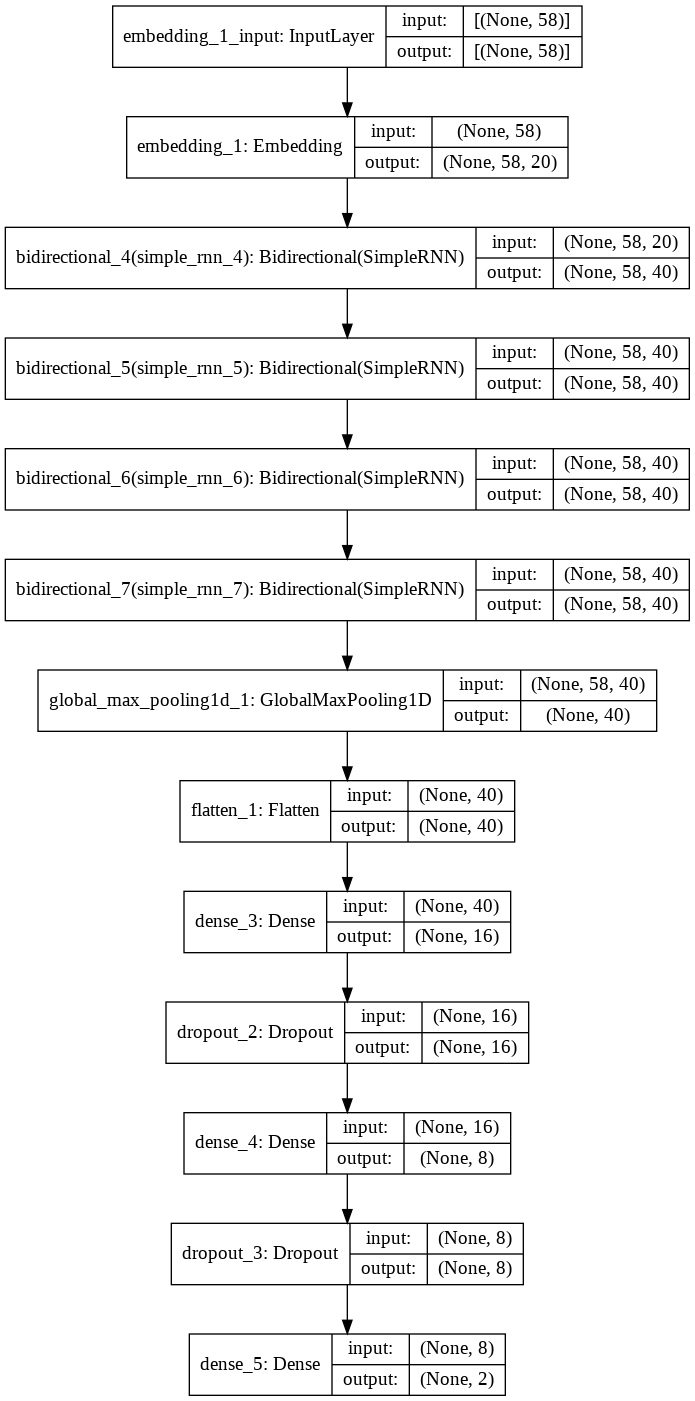

In [ ]:
tf.keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)

In [ ]:
epochs = 40
modelData = model.fit(train_ds.shuffle(1200).batch(140),
                    epochs= epochs ,
                    validation_data=valid_ds.batch(140),
                    verbose=1)

Epoch 1/40


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4847: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`categorical_crossentropy` received `from_logits=True`, but '


48/48 [==============================] - 22s 241ms/step - loss: 1.1869 - categorical_accuracy: 0.7676 - val_loss: 1.0390 - val_categorical_accuracy: 0.7826
Epoch 2/40
48/48 [==============================] - 11s 221ms/step - loss: 0.9753 - categorical_accuracy: 0.7715 - val_loss: 0.9136 - val_categorical_accuracy: 0.7826
Epoch 3/40
48/48 [==============================] - 10s 216ms/step - loss: 0.8626 - categorical_accuracy: 0.7727 - val_loss: 0.8027 - val_categorical_accuracy: 0.7826
Epoch 4/40
48/48 [==============================] - 10s 216ms/step - loss: 0.7896 - categorical_accuracy: 0.7727 - val_loss: 0.7588 - val_categorical_accuracy: 0.7826
Epoch 5/40
48/48 [==============================] - 11s 230ms/step - loss: 0.7247 - categorical_accuracy: 0.7727 - val_loss: 0.6485 - val_categorical_accuracy: 0.7826
Epoch 6/40
48/48 [==============================] - 11s 227ms/step - loss: 0.6350 - categorical_accuracy: 0.7727 - val_loss: 0.5206 - val_categorical_accuracy: 0.7826
Epoch 7/4

In [ ]:
predictions = model.predict(test_x)
predictions = predictions.argmax(axis=1)
print(predictions)

[1 0 1 ... 0 0 0]


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y, predictions)

0.98691226369365

In [ ]:
target_names = ['0','1']
print(classification_report(test_y, predictions, target_names=target_names))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1608
           1       0.99      0.95      0.97       455

    accuracy                           0.99      2063
   macro avg       0.99      0.97      0.98      2063
weighted avg       0.99      0.99      0.99      2063



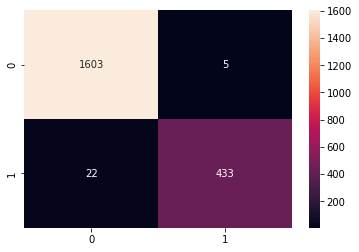

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
conMat = confusion_matrix(test_y,predictions)
sns.heatmap(conMat, annot=True, fmt='d',xticklabels=['0','1'], yticklabels=['0','1'])


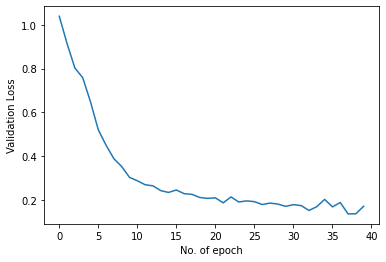

In [ ]:
plt.plot(modelData.history['val_loss'])
plt.ylabel('Validation Loss')
plt.xlabel('No. of epoch')
plt.show()